In [4]:
import numpy as np
import lab1.method.gradient_descent as gd
import lab1.method.dichotomy_gradient as dg
import lab1.plot.plotter as plotter
import lab1.method.func_generation as fg
import lab1.method.wolfe_gradient as wg

In [5]:
def multiply(x, m, n):
    v = np.zeros(n, dtype=object)
    for i in range(n):
        for j in range(n):
            v[i] += x[j] * m[j][i]
    res = 0
    for i in range(n):
        res += v[i] * x[i]
    return res


def f(n):
    return lambda x: np.matmul(np.matmul(x, matrix), x.T)


def grad_calculator(x, func, n):
    h = 1e-5
    res = []
    for i in range(n):
        delta = np.zeros(n)
        delta[i] = h
        res.append((func(x + delta) - func(x - delta)) / (2 * h))
    return np.asarray(res)

def grad(func, n):
    return lambda x : grad_calculator(x, func, n)
    #h = 1e-5
    #return lambda x: (func(x[:, np.newaxis] + h * np.eye(n)) - func(x[:, np.newaxis] - h * np.eye(n))) / (2 * h)

n: 11, k: 10
ne wolfe: 7.0455509782872406e-12
n: 12, k: 10
ne wolfe: 7.090405595356179e-12
n: 13, k: 10
ne wolfe: 7.648321343605803e-12
n: 14, k: 10
ne wolfe: 5.99083717564187e-12
n: 15, k: 10
ne wolfe: 7.257029525453982e-12
n: 16, k: 10
ne wolfe: 5.936383292157201e-12
n: 17, k: 10
ne wolfe: 5.441745734690426e-12
n: 18, k: 10
ne wolfe: 7.00638119714082e-12
n: 19, k: 10
ne wolfe: 7.790064979155974e-12
n: 20, k: 10
ne wolfe: 8.671844838880456e-12
n: 11, k: 60
ne wolfe: 1.3240593499052863e-11
n: 12, k: 60
ne wolfe: 1.1040476681975798e-11
n: 13, k: 60
ne wolfe: 1.1804061391832445e-11
n: 14, k: 60
ne wolfe: 1.197739689758527e-11
n: 15, k: 60
ne wolfe: 1.2004376525553115e-11
n: 16, k: 60
ne wolfe: 1.1973314310268247e-11
n: 17, k: 60
ne wolfe: 1.3813293272509764e-11
n: 18, k: 60
ne wolfe: 1.0971455776758351e-11
n: 19, k: 60
ne wolfe: 1.1483340987974258e-11
n: 20, k: 60
ne wolfe: 1.314791150683865e-11
n: 11, k: 110
ne wolfe: 1.4945313224892717e-11
n: 12, k: 110
ne wolfe: 1.2391019837793468e-11

<module 'matplotlib.pyplot' from 'C:\\Users\\alekmia\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

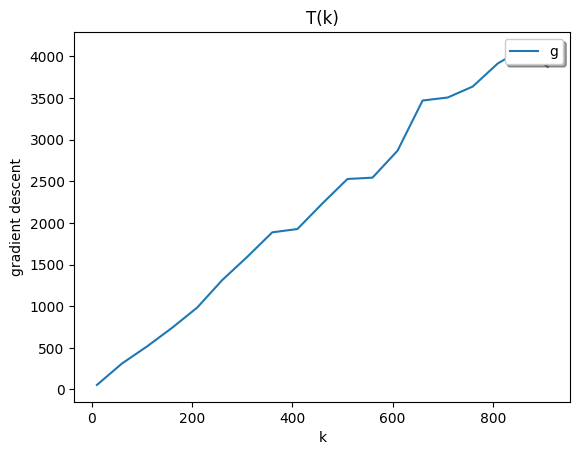

In [25]:
dependency = []
x = []
y = []
xsum = 0
# n = 10
for k in range(10, 950, 50):
    for n in range(11, 21, 1):
        start = np.ones(n)
        matrix = fg.generate_func(n, k)
        points1, l, _ = dg.dichotomy_gradient(f(n), grad(f(n), n), start, 1e-5, 1e-4, 2)
        # points1, l, _ = gd.gradient_descent(f(n), grad(f(n), n), start, 1e-6, 0.001, 100000)
    #points2, _, _ = wg.wolfe_gradient(f, grad, start, 1e-4, alpha=0.5)
        print("n: {}, k: {}".format(n, k))
        print("ne wolfe:", f(n)(points1[-1]))
        # print("wolfe:", f(points2[-1]))
        xsum = xsum + l
    x.append(k)
    y.append(xsum / 10)
    xsum = 0
plotter.plot_by_two_coordinates(x, y, "k")

n: 10, k: 10
ne wolfe: 6.901499835281052e-12
n: 10, k: 10
ne wolfe: 6.498597824349906e-12
n: 10, k: 10
ne wolfe: 6.388652198512085e-12
n: 10, k: 10
ne wolfe: 5.782079222384391e-12
n: 10, k: 10
ne wolfe: 9.842385362116179e-12
n: 10, k: 10
ne wolfe: 8.681722142090835e-12
n: 10, k: 10
ne wolfe: 7.658829988397882e-12
n: 10, k: 10
ne wolfe: 6.8224935630867756e-12
n: 10, k: 10
ne wolfe: 6.990110872772497e-12
n: 10, k: 10
ne wolfe: 6.922074554592855e-12
n: 10, k: 60
ne wolfe: 1.3170550502505198e-11
n: 10, k: 60
ne wolfe: 1.2852370482885028e-11
n: 10, k: 60
ne wolfe: 1.5209576659144987e-11
n: 10, k: 60
ne wolfe: 1.3424143416007001e-11
n: 10, k: 60
ne wolfe: 1.202354717557195e-11
n: 10, k: 60
ne wolfe: 1.3151514561930657e-11
n: 10, k: 60
ne wolfe: 1.5150200557778088e-11
n: 10, k: 60
ne wolfe: 1.2318450683774224e-11
n: 10, k: 60
ne wolfe: 9.819933727409452e-12
n: 10, k: 60
ne wolfe: 1.245354492469859e-11
n: 10, k: 110
ne wolfe: 1.4132934729940922e-11
n: 10, k: 110
ne wolfe: 1.693166243067371e-11

<module 'matplotlib.pyplot' from 'C:\\Users\\alekmia\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

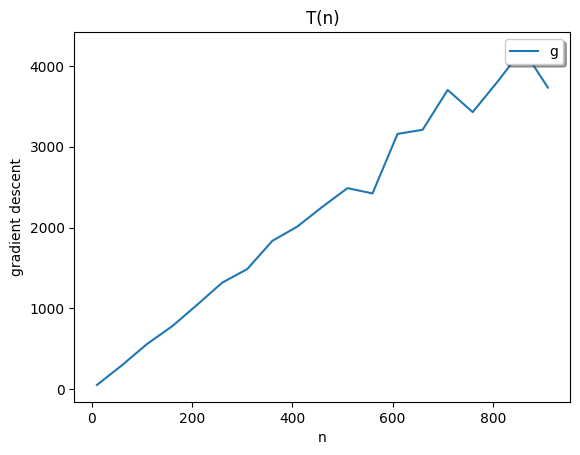

In [33]:
x.clear()
y.clear()
n = 10
count = 10
ysum = 0
for k in range(10, 950, 50):
    for _ in range(count):
        start = np.ones(n)
        matrix = fg.generate_func(n, k)
        points1, l, _ = dg.dichotomy_gradient(f(n), grad(f(n), n), start, 1e-5, 1e-4, 1)
        #points2, _, _ = wg.wolfe_gradient(f, grad, start, 1e-4, alpha=0.5)
        print("n: {}, k: {}".format(n, k))
        print("ne wolfe:", f(n)(points1[-1]))
        # print("wolfe:", f(points2[-1]))
        ysum = ysum + l
    x.append(k)
    y.append(ysum / count)
    ysum = 0
plotter.plot_by_two_coordinates(x, y, "n")


In [ ]:
x.clear()
y.clear()
k = 10
count = 10
ysum = 0
for n in range(10, 950, 50):
    for _ in range(count):
        start = np.ones(n)
        matrix = fg.generate_func(n, k)
        points1, l, _ = dg.dichotomy_gradient(f(n), grad(f(n), n), start, 1e-5, 1e-4, 1)
        #points2, _, _ = wg.wolfe_gradient(f, grad, start, 1e-4, alpha=0.5)
        print("n: {}, k: {}".format(n, k))
        print("ne wolfe:", f(n)(points1[-1]))
        # print("wolfe:", f(points2[-1]))
        ysum = ysum + l
    x.append(n)
    y.append(ysum / count)
    ysum = 0
plotter.plot_by_two_coordinates(x, y, "n")
